# Noise Plots

In [1]:
import qsttoolkit as qst
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nc = 32
Nd = 20
xgrid = np.linspace(-5, 5, Nd)
pgrid = np.linspace(-5, 5, Nd)

In [3]:
measurement_operators = qst.tomography.measurement_operators(Nc, 'Husimi_Q', xgrid=xgrid, pgrid=pgrid)

<Axes: title={'center': 'Husimi Q function for fresh'}, xlabel='Re($\\beta$)', ylabel='Im($\\beta$)'>

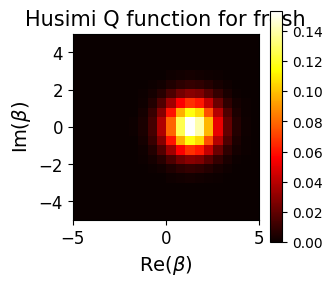

In [4]:
test_state = qt.coherent_dm(Nc, 1)
qst.plot_Husimi_Q(test_state, xgrid=xgrid, ygrid=pgrid, label='fresh')

In [8]:
data = qt.qfunc(test_state, xgrid, pgrid)

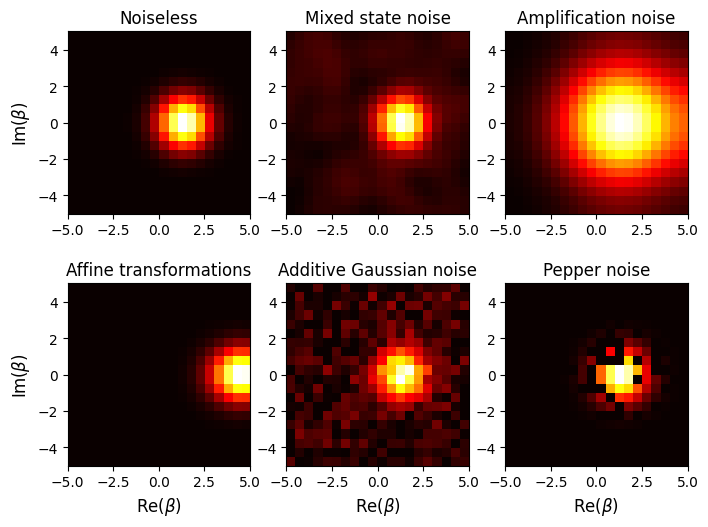

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

axs[0, 0].imshow(data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[0, 0].set_title('Noiseless', fontsize=12)
# axs[0, 0].set_xlabel("Re($\\beta$)", fontsize=12)
axs[0, 0].set_ylabel("Im($\\beta$)", fontsize=12)

axs[0, 1].imshow(qt.qfunc(qt.Qobj(qst.mixed_state_noise(test_state, 0.8)), xgrid, pgrid), extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[0, 1].set_title('Mixed state noise', fontsize=12)
# axs[0, 1].set_xlabel("Re($\\beta$)", fontsize=12)
# axs[0, 1].set_ylabel("Im($\\beta$)", fontsize=12)

axs[0, 2].imshow(qst.gaussian_convolution(data, 4), extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[0, 2].set_title('Amplification noise', fontsize=12)
# axs[0, 2].set_xlabel("Re($\\beta$)", fontsize=12)
# axs[0, 2].set_ylabel("Im($\\beta$)", fontsize=12)

axs[1, 0].imshow(qst.affine_transformation(data, 30, 0.4, 0.4), extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[1, 0].set_title('Affine transformations', fontsize=12)
axs[1, 0].set_xlabel("Re($\\beta$)", fontsize=12)
axs[1, 0].set_ylabel("Im($\\beta$)", fontsize=12)

axs[1, 1].imshow(qst.additive_gaussian_noise(data, np.mean(data), 0.01), extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[1, 1].set_title('Additive Gaussian noise', fontsize=12)
axs[1, 1].set_xlabel("Re($\\beta$)", fontsize=12)
# axs[1, 1].set_ylabel("Im($\\beta$)", fontsize=12)

axs[1, 2].imshow(qst.salt_and_pepper_noise(data, 0.3), extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[1, 2].set_title('Pepper noise', fontsize=12)
axs[1, 2].set_xlabel("Re($\\beta$)", fontsize=12)
# axs[1, 2].set_ylabel("Im($\\beta$)", fontsize=12)

plt.savefig('noise.png', dpi=300, bbox_inches='tight')
plt.show()

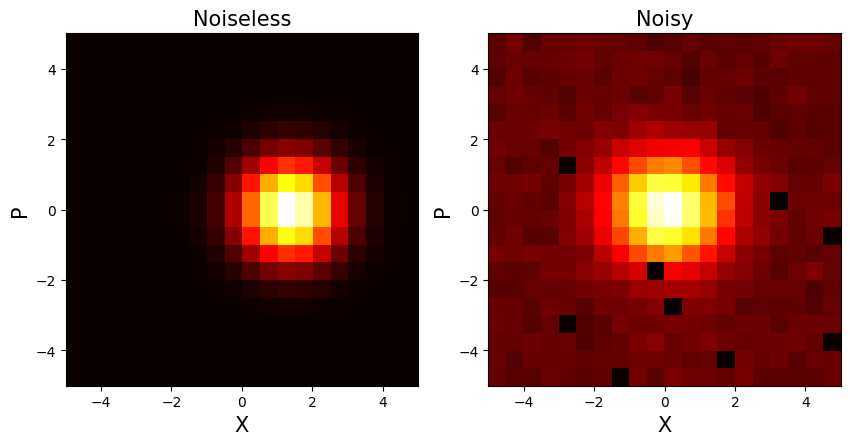

In [7]:
data = qt.qfunc(test_state, xgrid, pgrid)
noisy_dm = qt.Qobj(qst.mixed_state_noise(test_state, 0.5))
noisy_data = qst.apply_measurement_noise(qst.gaussian_convolution(qt.qfunc(noisy_dm, xgrid, pgrid), 1), 30, 0.1, 0.1, 0.001, 0.03)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[0].set_title('Noiseless', fontsize=15)
axs[0].set_xlabel('X', fontsize=15)
axs[0].set_ylabel('P', fontsize=15)

axs[1].imshow(noisy_data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[1].set_title('Noisy', fontsize=15)
axs[1].set_xlabel('X', fontsize=15)
axs[1].set_ylabel('P', fontsize=15)

plt.show()